In [1]:
import parselmouth
import textgrids

import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
plt.rcParams["font.sans-serif"] = ["STFangsong"]
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.constrained_layout.use'] = True

In [3]:
tones = ["", "阴平", "阳平", "阴上", "阳上", "阴去", "阳去", "阴入", "阳入"]

In [18]:
def draw(tone):
    snd = parselmouth.Sound("Tone%d.wav" % tone)
    grid = textgrids.TextGrid("Tone%d.TextGrid" % tone)
    plt.subplot(2, 4, tone)
    #plt.figure()
    plt.grid(False)
    plt.title("%d %s" % (tone, tones[tone]))
    plt.xlabel("时间")
    plt.ylabel("基频 (Hz)")
    plt.xlim(0, 1.0)
    plt.ylim(90, 180)
    plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
    X = []
    Y = []
    for token in grid['tokens']:
        text = token.text.transcode()
        if not text or text.isspace():
            continue
        selected_snd = snd.extract_part(token.xmin, token.xmax)
        pitch = selected_snd.to_pitch()
        xs = pitch.xs()
        ys = pitch.selected_array['frequency']
        xs = xs[ys > 0]
        ys = ys[ys > 0]
        xmin = min(xs)
        xmax = max(xs)
        xs = np.vectorize(lambda x: (x - xmin) / (xmax - xmin))(xs)
        plt.plot(xs, ys, label=text, linestyle=":", linewidth=.75)
        X += xs.tolist()
        Y += ys.tolist()
    fit.append(np.polyfit(X, Y, 3))
    xs = [i / 100 for i in range(100)]
    plt.plot(xs, np.polyval(fit[tone - 1], xs), linewidth=1.5, color="blue")
    #plt.figlegend()

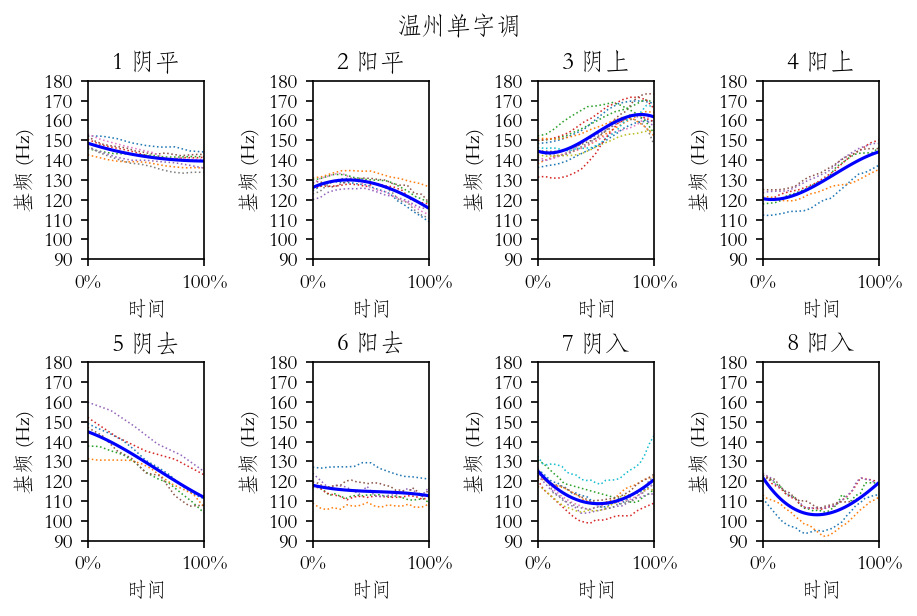

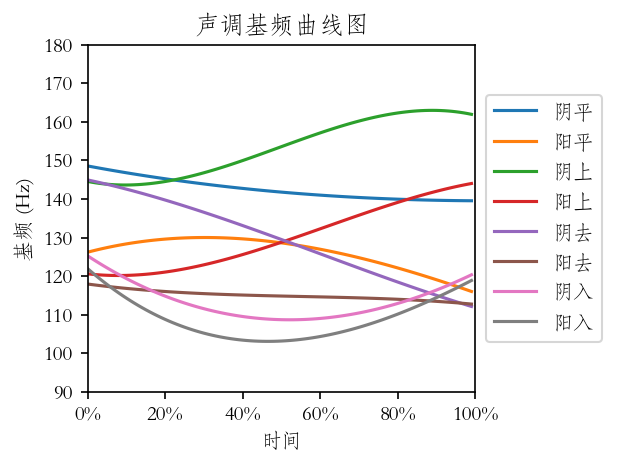

In [19]:
plt.figure(facecolor="white")
fit = []
for i in range(1, 9):
    draw(i)
plt.suptitle("温州单字调")
#plt.show()
plt.savefig("tone.png", dpi=600)

plt.figure(facecolor="white", figsize=(4, 3))
plt.title("声调基频曲线图")
plt.xlabel("时间")
plt.ylabel("基频 (Hz)")
plt.xlim(0, 1.0)
plt.ylim(90, 180)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
xs = [i / 100 for i in range(100)]
for i in range(1, 9):
    plt.plot(xs, np.polyval(fit[i - 1], xs), linewidth=1.5, label=tones[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [6]:
log_values = [math.log(np.polyval(fit[i - 1], j / 10), 10) for i in range(1, 9) for j in range(1, 11 if i != 2 and i != 5 else 10)]
mean = statistics.mean(log_values)
sd = statistics.stdev(log_values)

In [7]:
lz_values = [[(math.log(np.polyval(fit[i - 1], j / 100), 10) - mean) / sd for j in range(101)] for i in range(1, 9)]

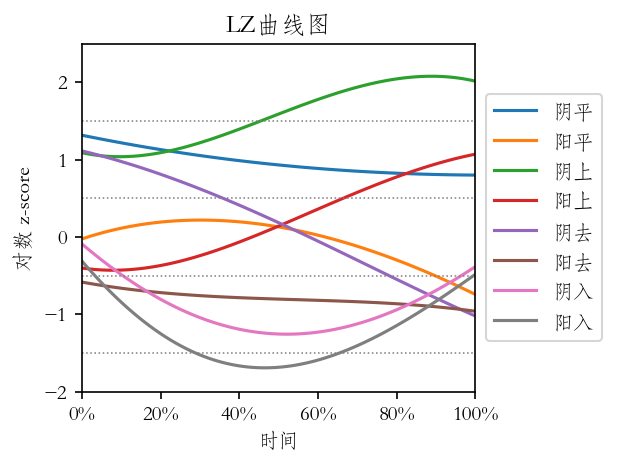

In [11]:
plt.figure(facecolor="white", figsize=(4, 3))
plt.title("LZ曲线图")
plt.xlabel("时间")
plt.ylabel("对数 z-score")
plt.xlim(0, 1.0)
plt.ylim(-2, 2.5)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
#plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
xs = [i / 100 for i in range(101)]
for i in range(1, 9):
    plt.plot(xs, lz_values[i - 1], linewidth=1.5, label=tones[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.grid(axis="y", linestyle=":")
for i in range(4):
    plt.plot(xs, [i - 1.5] * 101, linestyle=":", color="gray", linewidth=0.75)
plt.show()

In [33]:
def draw_standalone(tone):
    snd = parselmouth.Sound("Tone%d.wav" % tone)
    grid = textgrids.TextGrid("Tone%d.TextGrid" % tone)
    plt.figure()
    plt.grid(False)
    plt.title("温州单字调 %d %s" % (tone, tones[tone]))
    plt.xlabel("时间")
    plt.ylabel("基频 (Hz)")
    plt.xlim(0, 0.25)
    plt.ylim(90, 180)
    #plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
    X = []
    Y = []
    for token in grid['tokens']:
        text = token.text.transcode()
        if not text or text.isspace():
            continue
        selected_snd = snd.extract_part(token.xmin, token.xmax)
        pitch = selected_snd.to_pitch()
        xs = pitch.xs()
        ys = pitch.selected_array['frequency']
        xs = xs[ys > 0]
        ys = ys[ys > 0]
        xmin = min(xs)
        xmax = max(xs)
        #xs = np.vectorize(lambda x: (x - xmin) / (xmax - xmin))(xs)
        plt.plot(xs, ys, label=text, linestyle=":", linewidth=.75)
        X += xs.tolist()
        Y += ys.tolist()
    fit.append(np.polyfit(X, Y, 3))
    xs = [i / 100 for i in range(100)]
    #plt.plot(xs, np.polyval(fit[tone - 1], xs), linewidth=1.5, color="blue")
    #plt.figlegend()

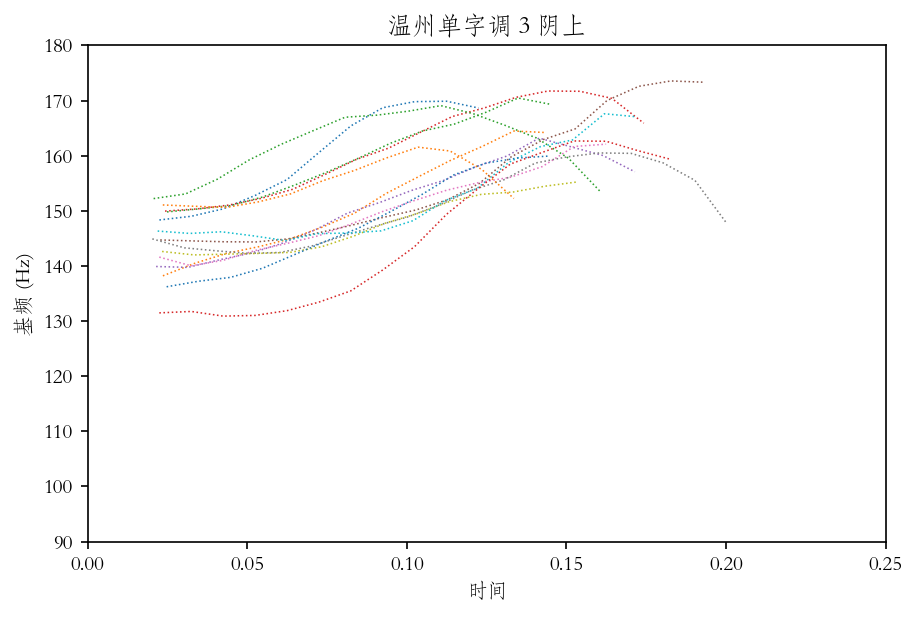

In [35]:
draw_standalone(3)

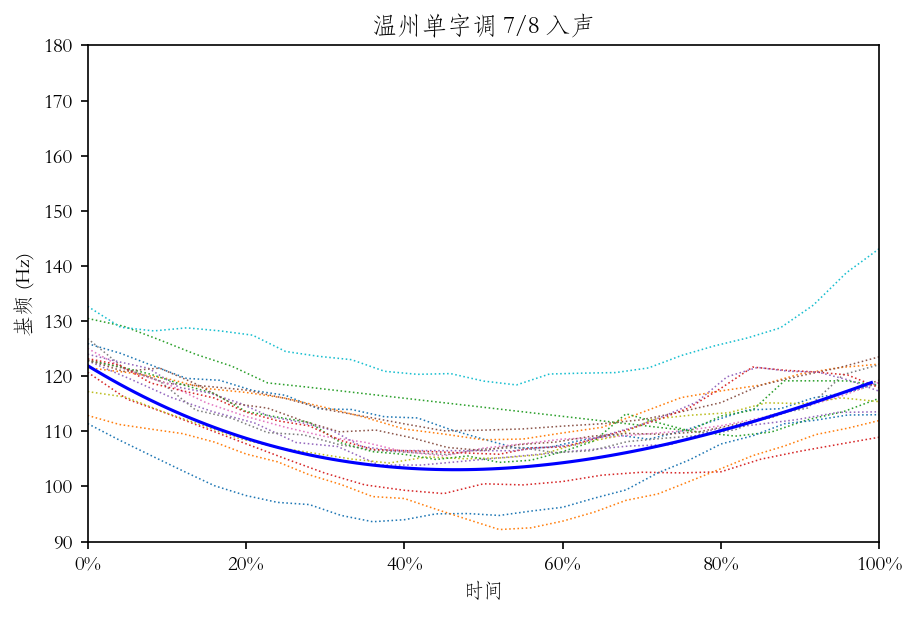

In [28]:
plt.figure()
plt.grid(False)
plt.title("温州单字调 7/8 入声")
plt.xlabel("时间")
plt.ylabel("基频 (Hz)")
plt.xlim(0, 1.0)
plt.ylim(90, 180)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(10))
X = []
Y = []
for tone in [7, 8]:
    snd = parselmouth.Sound("Tone%d.wav" % tone)
    grid = textgrids.TextGrid("Tone%d.TextGrid" % tone)
    for token in grid['tokens']:
        text = token.text.transcode()
        if not text or text.isspace():
            continue
        selected_snd = snd.extract_part(token.xmin, token.xmax)
        pitch = selected_snd.to_pitch()
        xs = pitch.xs()
        ys = pitch.selected_array['frequency']
        xs = xs[ys > 0]
        ys = ys[ys > 0]
        xmin = min(xs)
        xmax = max(xs)
        xs = np.vectorize(lambda x: (x - xmin) / (xmax - xmin))(xs)
        plt.plot(xs, ys, label=text, linestyle=":", linewidth=.75)
        X += xs.tolist()
        Y += ys.tolist()
fit.append(np.polyfit(X, Y, 3))
xs = [i / 100 for i in range(100)]
plt.plot(xs, np.polyval(fit[tone - 1], xs), linewidth=1.5, color="blue")